In [22]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [52]:
file=pd.read_csv("C:/Users/doaad/Documents/NTI data analysis/Bayut data.csv")
df=pd.DataFrame(file)
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1871 entries, 0 to 1870
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Department_name    1871 non-null   object 
 1   Department_number  1871 non-null   object 
 2   Location           1871 non-null   object 
 3   Unnamed: 3         1871 non-null   object 
 4   status             1871 non-null   object 
 5   Unnamed: 5         780 non-null    object 
 6   Unnamed: 6         312 non-null    object 
 7   Unnamed: 7         156 non-null    object 
 8   Unnamed: 8         156 non-null    object 
 9   Unnamed: 9         156 non-null    object 
 10  Department_name.1  1871 non-null   object 
 11  Unnamed: 11        0 non-null      float64
 12  price              1871 non-null   object 
dtypes: float64(1), object(12)
memory usage: 190.2+ KB


In [53]:
file.isna().sum()

Department_name         0
Department_number       0
Location                0
Unnamed: 3              0
status                  0
Unnamed: 5           1091
Unnamed: 6           1559
Unnamed: 7           1715
Unnamed: 8           1715
Unnamed: 9           1715
Department_name.1       0
Unnamed: 11          1871
price                   0
dtype: int64

In [54]:
df.replace(np.nan," ",inplace=True)

In [55]:
df.isna().sum()

Department_name      0
Department_number    0
Location             0
Unnamed: 3           0
status               0
Unnamed: 5           0
Unnamed: 6           0
Unnamed: 7           0
Unnamed: 8           0
Unnamed: 9           0
Department_name.1    0
Unnamed: 11          0
price                0
dtype: int64

In [56]:
df.describe

<bound method NDFrame.describe of                    Department_name Department_number    Location Unnamed: 3  \
0               Park View Compound    1st Settlement   New Cairo      Cairo   
1     Lake view Residence Compound    5th Settlement   New Cairo      Cairo   
2                Villette Compound    5th Settlement   New Cairo      Cairo   
3                  Mivida Compound    5th Settlement   New Cairo      Cairo   
4                 Eastown Compound    5th Settlement   New Cairo      Cairo   
...                            ...               ...         ...        ...   
1866         Village Gate Compound    5th Settlement   New Cairo      Cairo   
1867  Lake view Residence Compound    5th Settlement   New Cairo      Cairo   
1868     Koronfel Heights Compound    1st Settlement   New Cairo      Cairo   
1869           Cairo Festival City    5th Settlement   New Cairo      Cairo   
1870             Villette Compound    5th Settlement   New Cairo      Cairo   

                 

In [57]:
def merge_and_remove_columns(df, columns_to_merge, new_column_name='Merged'):
    # Filter only existing columns
    existing_columns = [col for col in columns_to_merge if col in df.columns]

    # If none of the columns exist, skip
    if not existing_columns:
        print(f"No valid columns to merge for '{new_column_name}'")
        return df

    # Merge and drop
    df[new_column_name] = (
        df[existing_columns]
        .astype(str)
        .apply(lambda row: ' '.join(val for val in row if val.lower() != 'nan'), axis=1)
    )
    df.drop(columns=existing_columns, inplace=True)
    return df


columns_to_merge = ['Location', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 
                    'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 
                    'Unnamed: 9', 'Unnamed: 10','Unnamed: 11']

df = merge_and_remove_columns(df, columns_to_merge, new_column_name='Regions')


In [40]:
df.columns

Index(['Department_name', 'Department_number', 'status', 'Type', 'price',
       'Regions'],
      dtype='object')

In [58]:
df.rename(columns={"Department_name.1":"Type"},inplace=True)

In [59]:
from bs4 import BeautifulSoup
import pandas as pd

# Assume your DataFrame is called df and the HTML column is named 'type_html'
# Replace 'type_html' with your actual column name
def extract_property_type(html):
    try:
        soup = BeautifulSoup(html, 'html.parser')
        return soup.find('span', attrs={'aria-label': 'Type'}).text.strip()
    except:
        return None  # Return None if structure is invalid or missing

# Apply the function to the whole column
df['property_type'] = df['Type'].apply(extract_property_type)


In [ ]:
from bs4 import BeautifulSoup

# Function to extract number from the 'price' HTML
def extract_price(html):
    try:
        soup = BeautifulSoup(html, 'html.parser')
        price_tag = soup.find('span', attrs={'aria-label': 'Price'})
        if price_tag:
            return int(price_tag.text.strip().replace(',', ''))  # handles "1,000" too
    except:
        pass
    return None  # fallback for invalid or missing entries

# Apply to the 'price' column
df['prices'] = df['price'].apply(extract_price)


In [64]:
df.columns

Index(['Department_name', 'Department_number', 'status', 'Type', 'price',
       'Regions', 'property_type', 'Prices', 'price_cleaned', 'prices'],
      dtype='object')

In [65]:
df.drop(columns=['Type'], inplace=True)


In [66]:
df.drop(columns=['price'],inplace=True)

In [68]:
df.rename(columns={"property_type":"Type"}, inplace=True)

In [72]:
df.drop(columns=['price_cleaned'],inplace=True)


KeyError: "['price_cleaned'] not found in axis"

In [73]:
df.drop(columns=['Prices'],inplace=True)

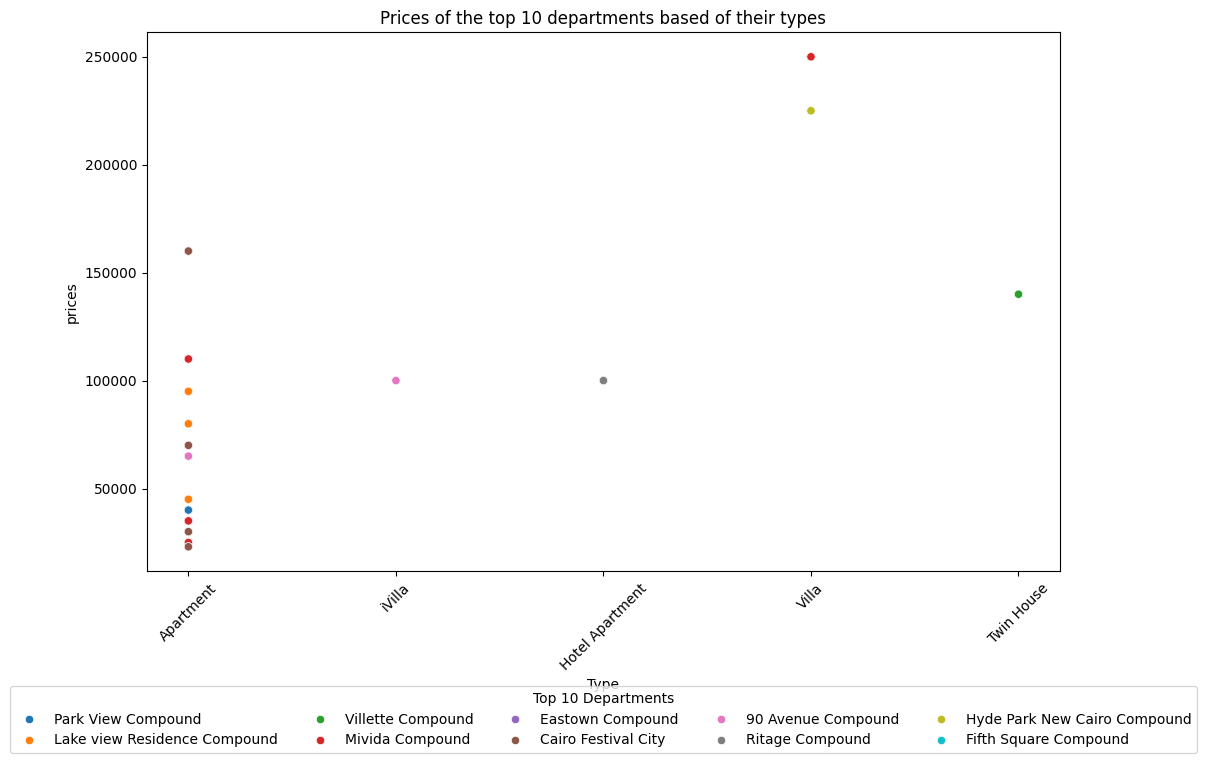

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Get the top 10 most frequent Departments
top_regions = df['Department_name'].value_counts().nlargest(10).index

# Step 2: Filter the DataFrame
df_top = df[df['Department_name'].isin(top_regions)]

# Step 3: Plot
plt.figure(figsize=(12, 8))

sns.scatterplot(
    x='Type',
    y='prices',
    hue='Department_name',
    data=df_top,
    palette='tab10'
)

# Step 4: Customize legend and axes
plt.title("Prices of the top 10 departments based of their types")
plt.legend(title='Top 10 Departments', loc='lower center', bbox_to_anchor=(0.5, -0.35), ncol=5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [106]:
df.groupby("Department_name")["Type"].value_counts().idxmax()

('Cairo Festival City', 'Apartment')

In [107]:
df.groupby("Department_name")["Type"].value_counts()

Department_name                Type           
90 Avenue Compound             Apartment           78
                               iVilla              78
Cairo Festival City            Apartment          312
Eastown Compound               Apartment           78
Fifth Square Compound          Apartment           78
Galleria Moon Valley Compound  Apartment           78
Hyde Park New Cairo Compound   Villa               78
Koronfel Heights Compound      Apartment           78
Lake view Residence Compound   Apartment          234
Mivida Compound                Apartment          312
                               Villa               77
Park View Compound             Apartment           78
Ritage Compound                Hotel Apartment     78
Village Gate Compound          Apartment           78
Villette Compound              Apartment           78
                               Twin House          78
Name: count, dtype: int64

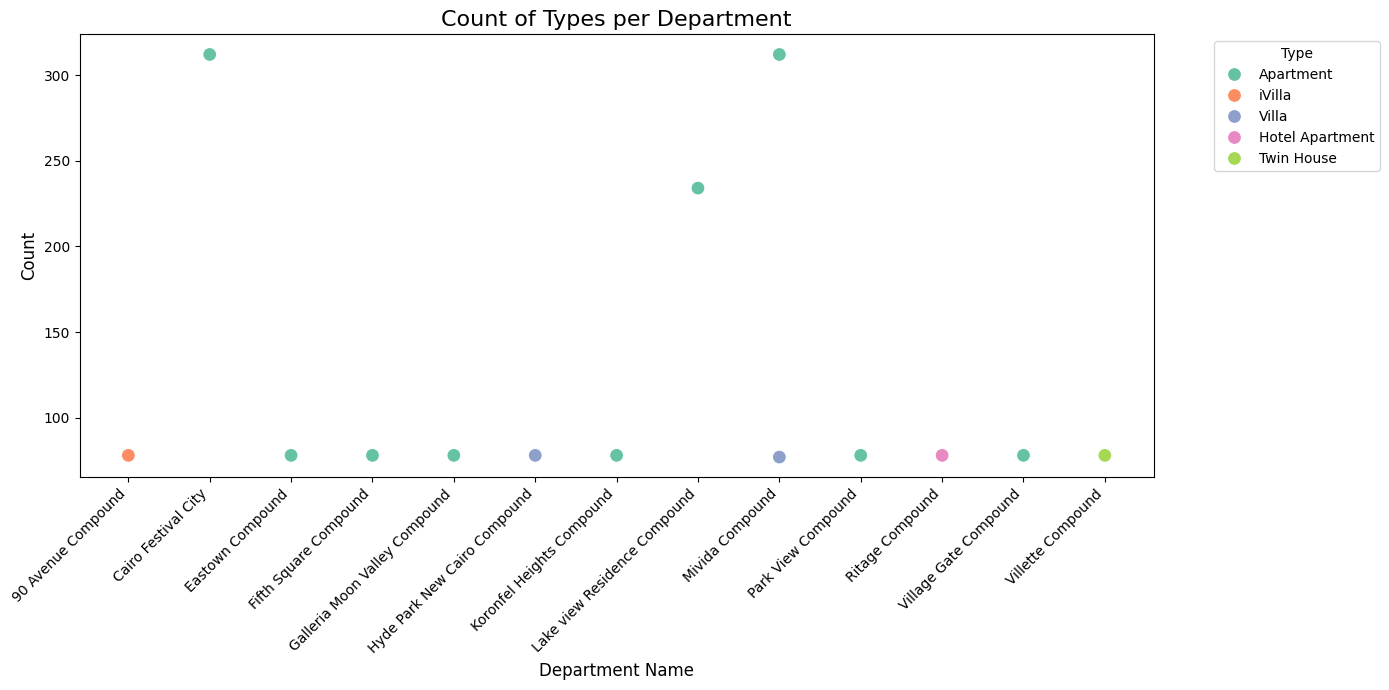

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Get value counts within each Department_name
grouped = df.groupby("Department_name")["Type"].value_counts().reset_index(name='count')

# Step 2: Plot as scatter plot
plt.figure(figsize=(14, 7))
sns.scatterplot(
    data=grouped,
    x='Department_name',
    y='count',
    hue='Type',
    s=100,  # point size
    palette='Set2'
)

# Step 3: Customize
plt.title("Count of Types per Department", fontsize=16)
plt.xlabel("Department Name", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Step 4: Show
plt.show()


In [116]:
df.groupby("Type")["prices"].mean().sort_values(ascending=False)


Type
Villa              237419.354839
Twin House         140000.000000
Hotel Apartment    100000.000000
iVilla             100000.000000
Apartment           62947.368421
Name: prices, dtype: float64

In [120]:
df.groupby("Description")["prices"].mean().sort_values(ascending=False)


status
Semi furnished Apartment 3rooms rent in Mivida Emaar New Cairo                                     250000.0
7-room furnished villa for rent in the distinguished Hyde Park Compound in the Fifth Settlement    225000.0
Semi-furnished apartment for rent in CFC Compound                                                  160000.0
Apartment for rent                                                                                 140000.0
lowest price Semi furnished Twin with special finishing 4rooms for rent in Mivida New Cairo        110000.0
Apartment for rent in 90 Avenue Compound                                                           100000.0
Fully furnished apartment for rent in Retaj Comp                                                   100000.0
best price Furnished Apartment with garden 2rooms For Rent in Lake View Residence New Cairo         95000.0
Apartment For rent in Galleria Moon Valley With Kitchen and ACs                                     85000.0
Twin House for Rent i

In [ ]:
container = soup.find_all("div", {'class': '_475e888a'})
container 

[<div class="_475e888a"><div class="_73e5aa2c"><div class="dca7f822"><div class="_6ed5f9fa"><div aria-label="Label" class="ee209838"><img alt="" aria-label="Signature" class="f1f78be0" src="/assets/iconCardLabelDefaultSignatureEN_noinline.5b4bdb3810b3e650b519cecd8f1271e0.svg"/></div></div></div></div><h4 class="_0e3d05b8 _5d2c9c26"><div class="_2923a568"><span aria-label="Currency" class="_06f65f02">EGP</span><span class="_9e0180f9"></span><span aria-label="Price" class="dc381b54">40,000</span></div><span aria-label="Frequency" class="fc7b94b8">Monthly</span></h4><div class="_5cbe8e5a"><div class="_948d9e0a d7383df5"><div class="_948d9e0a d05e0d48"><span class="_1822ec30 f34d293d"><span aria-label="Type" class="_19e94678 e0abc2de">Apartment</span></span><div class="e9953518"></div><span class="_1822ec30 f34d293d"><span class="_46a367d3 _18fde93a"></span><span aria-label="Beds" class="_19e94678 e0abc2de">2</span></span><span class="_1822ec30 f34d293d"><span class="_46a367d3 _30bf627c"><

C:\Users\doaad\AppData\Local\Temp\ipykernel_24224\3926144771.py:19: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


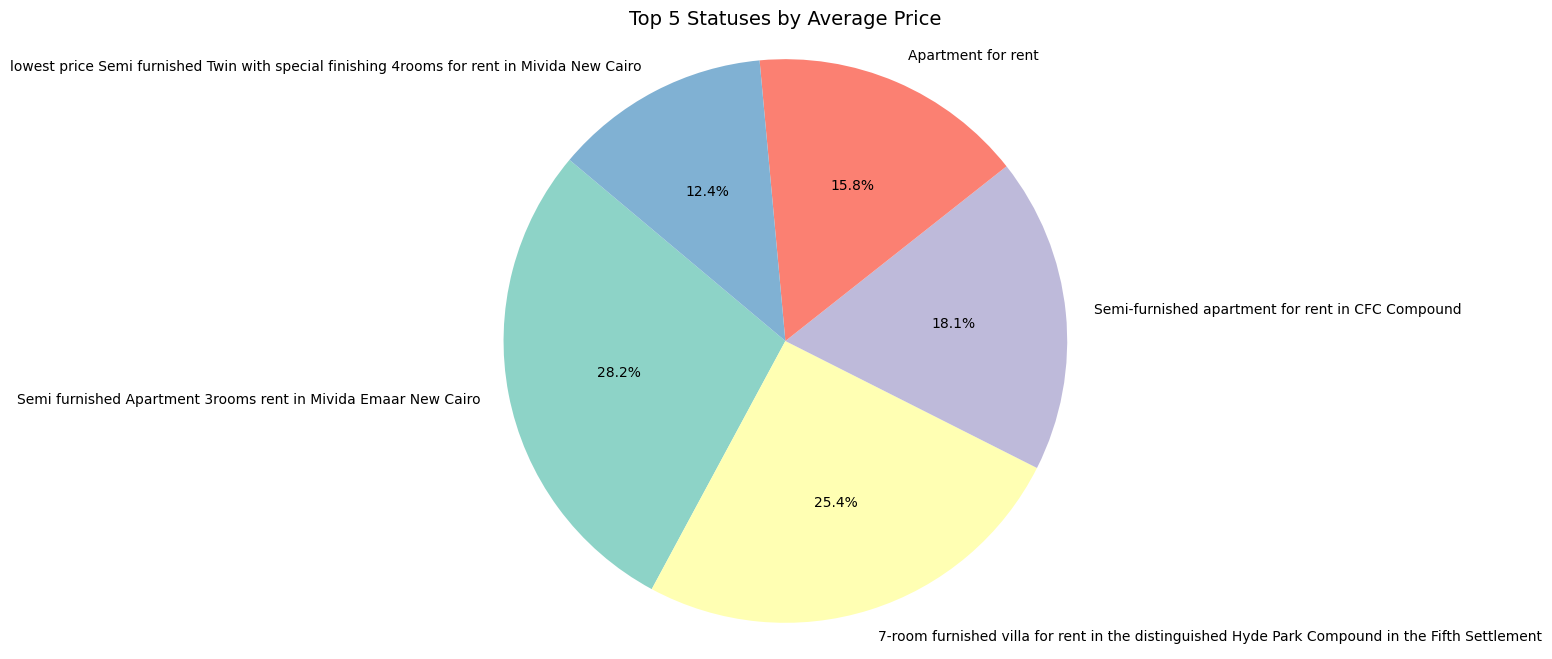

In [123]:
import matplotlib.pyplot as plt

# Step 1: Group, sort, and get top 5
Description_price_avg = df.groupby("Description")["prices"].mean().sort_values(ascending=False).head(5)

# Step 2: Plot as pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    Description_price_avg.values,
    labels=Description_price_avg.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Set3.colors  # optional: use a nice colormap
)

# Step 3: Customize
plt.title("Top 5 Statuses by Average Price", fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures the pie is a circle.
plt.tight_layout()

# Step 4: Show
plt.show()


In [87]:
df

,Department_name,Department_number,status,Regions,Type,prices
0,Park View Compound,1st Settlement,3BR Hotel-Style Apartment with 3 Bathrooms in ...,New Cairo Cairo,Apartment,40000
1,Lake view Residence Compound,5th Settlement,Furnished Apartment for Rent in LakeView Resid...,New Cairo Cairo,Apartment,45000
2,Villette Compound,5th Settlement,For rent,New Cairo Cairo a fully furnished apartment...,Apartment,25000
3,Mivida Compound,5th Settlement,For rent,New Cairo Cairo a fully furnished standalon...,Apartment,35000
4,Eastown Compound,5th Settlement,For rent,New Cairo Cairo a fully furnished apartment...,Apartment,70000
...,...,...,...,...,...,...
1866,Village Gate Compound,5th Settlement,semi furnished apartment With special finishin...,New Cairo Cairo,Apartment,55000
1867,Lake view Residence Compound,5th Settlement,Under market price apartment or rent in lakeview,New Cairo Cairo,Apartment,80000
1868,Koronfel Heights Compound,1st Settlement,Twin House for Rent in Qornfol Heights,New Cairo Cairo 90 St,Apartment,80000
1869,Cairo Festival City,5th Settlement,apartment with garden in cairo festival city,New Cairo Cairo,Apartment,23000


C:\Users\doaad\AppData\Local\Temp\ipykernel_24224\3658884715.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_price_avg.index, y=type_price_avg.values, palette='viridis')


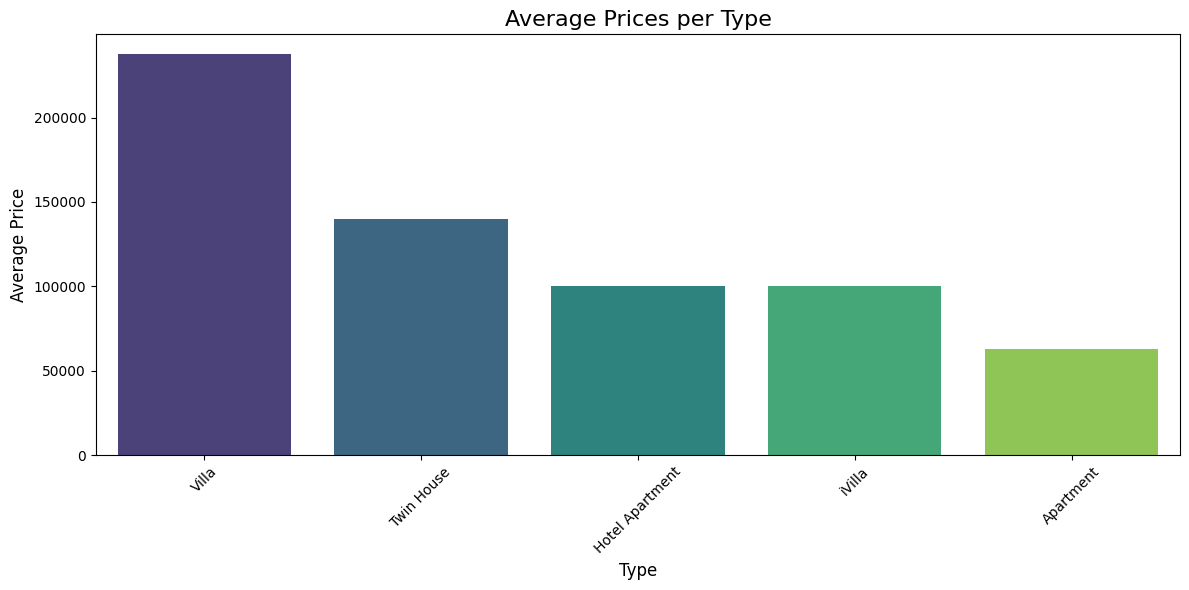

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Group and sort the data
type_price_avg = df.groupby("Type")["prices"].mean().sort_values(ascending=False)

# Step 2: Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=type_price_avg.index, y=type_price_avg.values, palette='viridis')

# Step 3: Customize
plt.title("Average Prices per Type", fontsize=16)
plt.xlabel("Type", fontsize=12)
plt.ylabel("Average Price", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Step 4: Show plot
plt.show()


In [128]:
df.rename(columns={"status":"Description"},inplace=True)

In [129]:
df.describe(include='all')

,Department_name,Department_number,Description,Regions,Type,prices
count,1871,1871,1871,1871,1871,1871.000000
unique,13,2,21,11,5,NaN
top,Mivida Compound,5th Settlement,For rent,New Cairo Cairo,Apartment,NaN
freq,389,1715,312,1091,1482,NaN
mean,NaN,NaN,NaN,NaN,NaN,83702.832710
std,NaN,NaN,NaN,NaN,NaN,58527.569147
min,NaN,NaN,NaN,NaN,NaN,23000.000000
25%,NaN,NaN,NaN,NaN,NaN,37500.000000
50%,NaN,NaN,NaN,NaN,NaN,70000.000000
75%,NaN,NaN,NaN,NaN,NaN,100000.000000


In [ ]:
df["prices"]=df["prices"]*1000

In [77]:
df["prices"]

0        40000
1        45000
2        25000
3        35000
4        70000
         ...  
1866     55000
1867     80000
1868     80000
1869     23000
1870    140000
Name: prices, Length: 1871, dtype: int64

In [18]:
df_unique = df.drop_duplicates()
df.value_counts().idxmax()

('90 Avenue Compound',
 ' 5th Settlement',
 ' New Cairo  Cairo Apartment for rent in 90 Avenue Compound  fully furnished  distinctive        ')

In [19]:
df.groupby(df["Department_name"])["Department_number"].value_counts()

Department_name                Department_number
90 Avenue Compound             5th Settlement       156
Cairo Festival City            5th Settlement       312
Eastown Compound               5th Settlement        78
Fifth Square Compound          5th Settlement        78
Galleria Moon Valley Compound  5th Settlement        78
Hyde Park New Cairo Compound   5th Settlement        78
Koronfel Heights Compound      1st Settlement        78
Lake view Residence Compound   5th Settlement       234
Mivida Compound                5th Settlement       389
Park View Compound             1st Settlement        78
Ritage Compound                5th Settlement        78
Village Gate Compound          5th Settlement        78
Villette Compound              5th Settlement       156
Name: count, dtype: int64

#What is the distribution of the departments

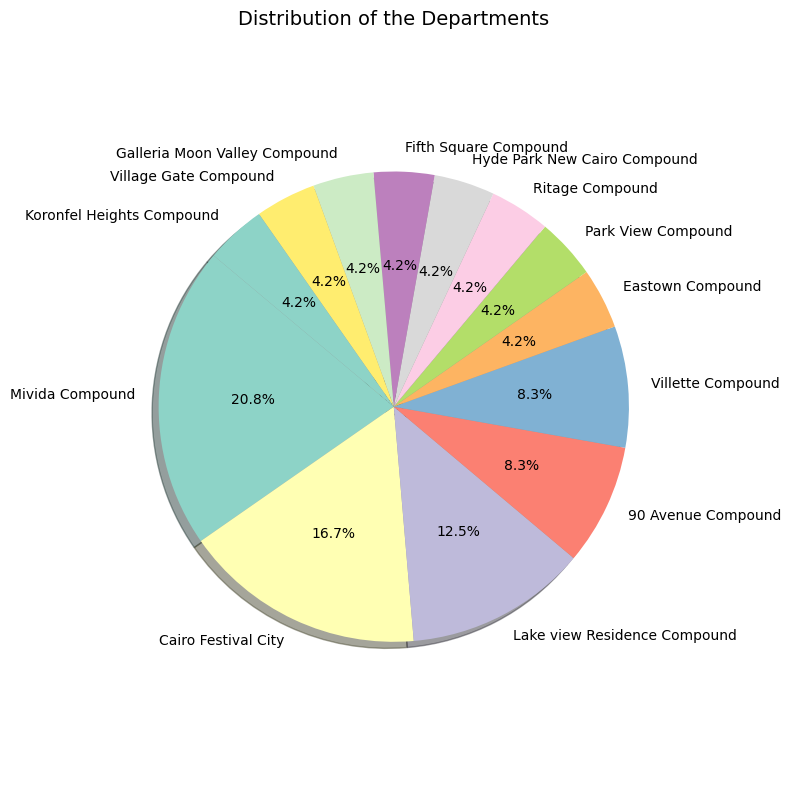

In [9]:
import matplotlib.pyplot as plt

dept_counts = df['Department_name'].value_counts()

# Plot
plt.figure(figsize=(8, 8))
plt.pie(dept_counts,
        labels=dept_counts.index,
        autopct='%1.1f%%',
        startangle=140,
        shadow=True,
        colors=plt.cm.Set3.colors)

plt.title('Distribution of the Departments', fontsize=14)
plt.axis('equal')  
plt.tight_layout()
plt.savefig('C:/Users/doaad/Documents/NTI data analysis/department_distribution.png', format='png', dpi=300)
plt.show()


what is the most common department number across the department names

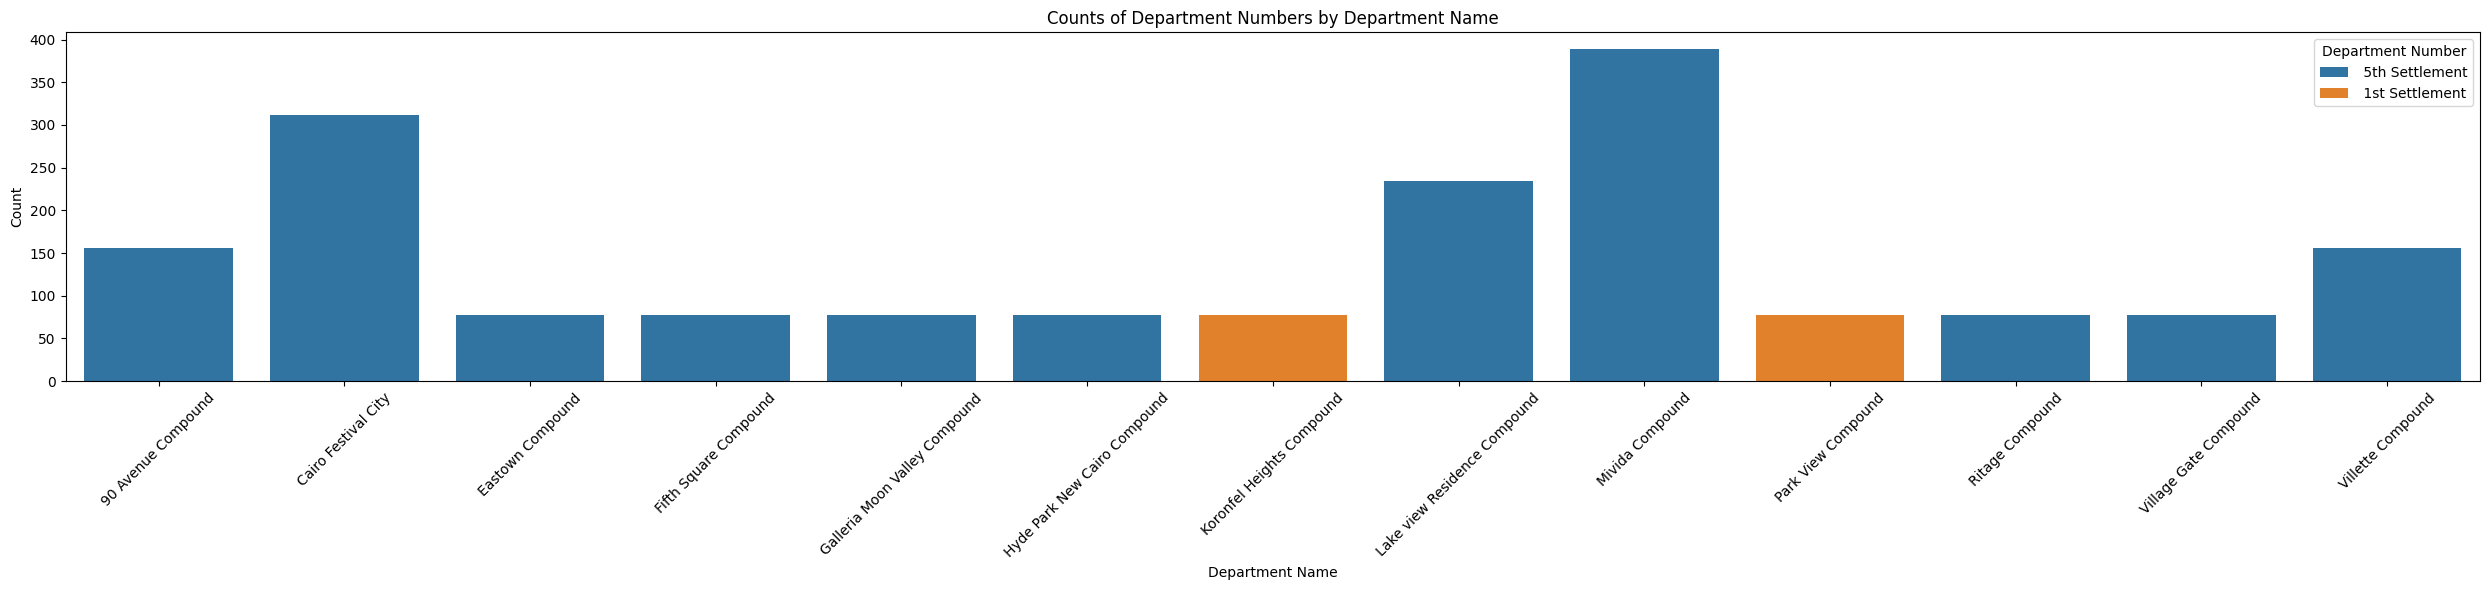

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reset the index to turn groupby object into a DataFrame
grouped = df.groupby(['Department_name', 'Department_number']).size().reset_index(name='Count')

# Plot
plt.figure(figsize=(25, 6))
sns.barplot(data=grouped, x='Department_name', y='Count', hue='Department_number')

plt.title('Counts of Department Numbers by Department Name')
plt.xlabel('Department Name')
plt.ylabel('Count')
plt.legend(title='Department Number')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('C:/Users/doaad/Documents/NTI data analysis/Counts_of_Department_Numbers_by_Department_Name.png', format='png', dpi=300)

plt.show()


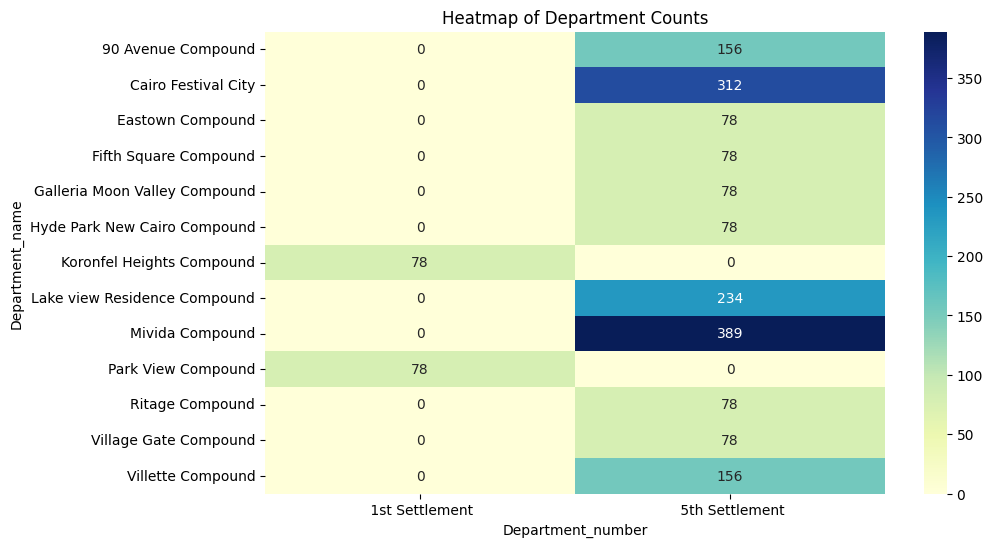

In [83]:
pivot = grouped.pivot(index='Department_name', columns='Department_number', values='Count').fillna(0)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, fmt='g', cmap='YlGnBu')
plt.title("Heatmap of Department Counts")
plt.show()


In [132]:
df.to_csv("C:/Users/doaad/Documents/NTI data analysis/cleaned data.csv")

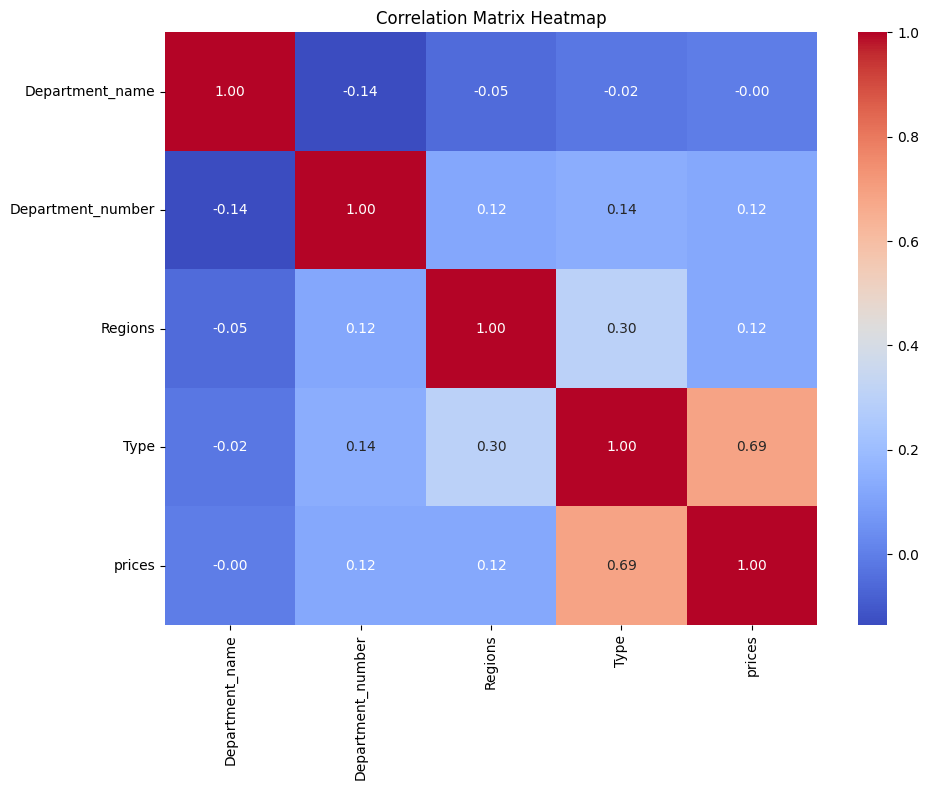

Mean Squared Error (MSE): 1801638015.558885
R² Score: 0.5303367231338841


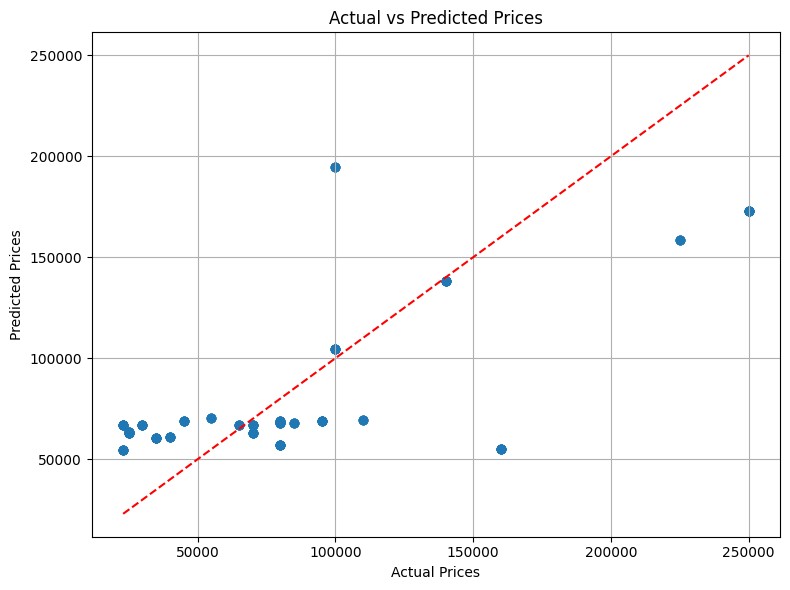

In [135]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the data
df = pd.read_csv('cleaned data.csv')

# Drop unnecessary columns
df_cleaned = df.drop(columns=['Unnamed: 0', 'Description'])

# Encode categorical variables
label_encoders = {}
for column in ['Department_name', 'Department_number', 'Regions', 'Type']:
    le = LabelEncoder()
    df_cleaned[column] = le.fit_transform(df_cleaned[column])
    label_encoders[column] = le

# Correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_cleaned.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

# Define features and target
X = df_cleaned.drop(columns='prices')
y = df_cleaned['prices']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

# Optional: Visualize predictions vs actual prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.grid(True)
plt.tight_layout()
plt.show()
